# Import Libs

In [42]:
import random
import pandas as pd
import numpy as np


# 0. Preparation (Setting the Random State)

In [43]:
rs = min(289456, 274211)
np.random.seed(rs)

# Exercise 1 (Loading and Preparing the Data)

In [120]:
# 1.1 Load the CSV file into a pandas DataFrame
df_tot = pd.read_csv('cla4lsp_customers.csv', sep='\t')

# 1.2 Create a sub-DF workdf with 2/3 of the original dataframe's rows (randomly sampled)
workdf = df_tot.sample(frac=2 / 3, random_state=rs)
# 1.3 hard-code labels and feature
labels = ['NumDealsPurchases', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4',
          'AcceptedCmp5', 'Recency', 'Complain', 'Recency']
features = ['Education', 'Marital_Status', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'MntWines',
            'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumWebPurchases',
            'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
columns_to_remove = ['ID', 'Z_CostContact', 'Z_Revenue']
# 1.4 Remove one feature column randomly from spending or purchasing habits
spending_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
                    'MntSweetProducts', 'MntGoldProds', 'NumWebPurchases',
                    'NumCatalogPurchases', 'NumStorePurchases']
col_to_remove = np.random.choice(spending_columns)
columns_to_remove.append(col_to_remove)
print("Random Column to be dropped: ", col_to_remove)
features.remove(col_to_remove)
workdf.drop(columns_to_remove, axis=1, inplace=True)

Random Column to be dropped:  NumStorePurchases


In [121]:
workdf.isnull().sum()

Year_Birth              0
Education               0
Marital_Status          0
Income                 17
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
dtype: int64

Since we have missing values in the income column we drop the missing values

In [122]:
# 1.5 Clean the dataset from missing values in the feature columns
workdf.dropna(inplace=True)
workdf.isnull().sum()


Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
dtype: int64

# Exercise 2 (Encoding of Categorical Data)

In [123]:
categorical_columns = list(workdf.select_dtypes(include=['object']).columns)
categorical_columns

['Education', 'Marital_Status', 'Dt_Customer']

In [124]:
for col in categorical_columns:
    unique_values = workdf[col].unique()
    print(f"Number of Unique values in '{col}': {len(unique_values)}")
    if len(unique_values) < 20:
        print(unique_values)


Number of Unique values in 'Education': 5
['Graduation' 'Master' 'PhD' '2n Cycle' 'Basic']
Number of Unique values in 'Marital_Status': 8
['Divorced' 'Together' 'Married' 'Single' 'Widow' 'Alone' 'YOLO' 'Absurd']
Number of Unique values in 'Dt_Customer': 609


1. Education:
Suggested Encoding Method: Ordinal Encoding or One-Hot Encoding
Reasoning:
If there is an inherent order in the education levels (e.g., "High School" < "Bachelor" < "Master"), you might consider using Ordinal Encoding.
If there is no specific order, and each education level is independent, One-Hot Encoding is often preferred.
2. Marital_Status:
Suggested Encoding Method: One-Hot Encoding
Reasoning:
Marital status typically doesn't have a natural order, making One-Hot Encoding a suitable choice.
3. Dt_Customer:
Suggested Encoding Method: Ordinal Encoding (if there's an order) or Feature Engineering
Since this column represents dates, encoding methods are a bit different compared to traditional categorical variables. Instead of directly encoding the date, we'll extract useful features from it. Common features to extract include the year, month, day, and potentially others like day of the week.


## Encoding for Dt_Customer:

In [125]:
Xworkdf = workdf[features].copy()
Xworkdf['Dt_Customer'] = pd.to_datetime(Xworkdf['Dt_Customer'], format="%d-%m-%Y")
Xworkdf['Dt_Customer_Year'] = Xworkdf['Dt_Customer'].dt.year
Xworkdf['Dt_Customer_Month'] = Xworkdf['Dt_Customer'].dt.month
Xworkdf['Dt_Customer_Day'] = Xworkdf['Dt_Customer'].dt.day
Xworkdf['Dt_Customer_DayOfWeek'] = Xworkdf['Dt_Customer'].dt.dayofweek

# now that we're done we can drop Dt_Customer
Xworkdf.drop("Dt_Customer", axis=1, inplace=True)
Xworkdf.columns

Index(['Education', 'Marital_Status', 'Year_Birth', 'Income', 'Kidhome',
       'Teenhome', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumWebVisitsMonth',
       'Dt_Customer_Year', 'Dt_Customer_Month', 'Dt_Customer_Day',
       'Dt_Customer_DayOfWeek'],
      dtype='object')

In [126]:
categorical_columns = ['Education', 'Marital_Status']

Xworkdf = pd.get_dummies(Xworkdf, columns=categorical_columns)
features = Xworkdf.columns

In [127]:
Xworkdf.head()

,Year_Birth,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
335,1960,62204.0,0,2,317,46,247,151,46,139,...,False,False,False,False,True,False,False,False,False,False
798,1973,73926.0,0,0,627,91,597,159,91,15,...,False,False,False,False,False,False,False,True,False,False
1707,1965,52117.0,0,1,112,10,107,30,0,20,...,False,False,False,False,False,False,False,True,False,False
999,1956,46086.0,0,1,244,8,32,7,2,50,...,False,False,False,False,True,False,False,False,False,False
1947,1974,83891.0,0,1,217,38,350,111,85,15,...,True,False,False,False,False,True,False,False,False,False


In [128]:
Xworkdf.columns


Index(['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumWebVisitsMonth', 'Dt_Customer_Year', 'Dt_Customer_Month',
       'Dt_Customer_Day', 'Dt_Customer_DayOfWeek', 'Education_2n Cycle',
       'Education_Basic', 'Education_Graduation', 'Education_Master',
       'Education_PhD', 'Marital_Status_Absurd', 'Marital_Status_Alone',
       'Marital_Status_Divorced', 'Marital_Status_Married',
       'Marital_Status_Single', 'Marital_Status_Together',
       'Marital_Status_Widow', 'Marital_Status_YOLO'],
      dtype='object')

In [93]:
# Xworkdf = Xworkdf[features]

# Exercise 3 (Preprocessing and full-PCA)

In [130]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Initialize scalers
std_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

numerical_columns = list(Xworkdf.select_dtypes(exclude=['bool']).columns)

Xworkdf_std = pd.DataFrame(std_scaler.fit_transform(Xworkdf[numerical_columns]))
Xworkdf_mm = pd.DataFrame(minmax_scaler.fit_transform(Xworkdf[numerical_columns]))

# Assign column names to the standardized DataFrame
Xworkdf_std.columns = numerical_columns

# Assign column names to the min-max scaled DataFrame
Xworkdf_mm.columns = numerical_columns

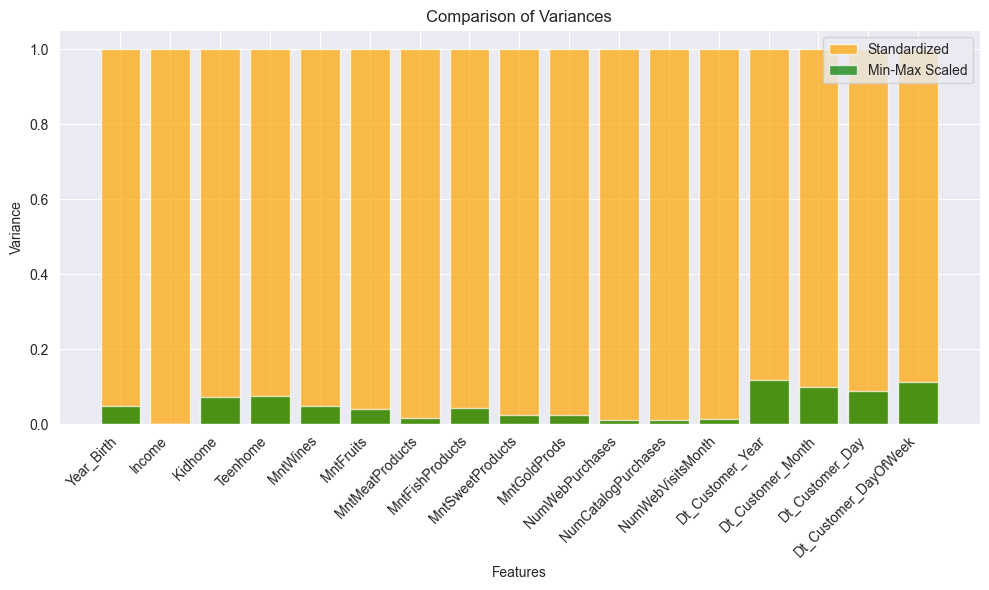

In [142]:
import matplotlib.pyplot as plt

# Calculate variances for each DataFrame
variances_original = Xworkdf[numerical_columns].var()
variances_std = Xworkdf_std.var()
variances_mm = Xworkdf_mm.var()

# Plot the variances
plt.figure(figsize=(10, 6))
plt.bar(variances_std.index, variances_std, color='orange', alpha=0.7, label='Standardized')
plt.bar(variances_mm.index, variances_mm, color='green', alpha=0.7, label='Min-Max Scaled')

plt.xlabel('Features')
plt.ylabel('Variance')
plt.title('Comparison of Variances')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [132]:
variance_comparison = pd.DataFrame({
    'Original': variances_original,
    'StandardScaler': variances_std,
    'MinMaxScaler': variances_mm
})

# Display the comparison
print(variance_comparison)

                           Original  StandardScaler  MinMaxScaler
Year_Birth             1.339033e+02        1.000678      0.047669
Income                 7.197096e+08        1.000678      0.001628
Kidhome                2.887267e-01        1.000678      0.072182
Teenhome               3.015112e-01        1.000678      0.075378
MntWines               1.115827e+05        1.000678      0.050126
MntFruits              1.599604e+03        1.000678      0.040393
MntMeatProducts        5.099578e+04        1.000678      0.017138
MntFishProducts        2.933021e+03        1.000678      0.043724
MntSweetProducts       1.658341e+03        1.000678      0.024159
MntGoldProds           2.475636e+03        1.000678      0.024026
NumWebPurchases        7.737559e+00        1.000678      0.010614
NumCatalogPurchases    8.905425e+00        1.000678      0.011359
NumWebVisitsMonth      5.665255e+00        1.000678      0.014163
Dt_Customer_Year       4.714510e-01        1.000678      0.117863
Dt_Custome

### Analyzing the Variance of across dataframes
01. Original Data:
The variances in the "Original" column represent the original distribution of the data before any scaling.
Variances vary significantly across columns, as the scale of the features is different.

2. MinMaxScaler (scaling to a specific range, e.g., [0, 1])
The variance is generally affected. Min-Max Scaling squeezes the data within a fixed interval(in this case [0,1]), so the range of values will be smaller, impacting the spread of the data.

3. Standardscaler (Z-score Normalization):
Standardscaler centers the data around a mean of 0 and scales it by the standard deviation. This process does not change the variance, as it maintains the spread of the data relative to its mean.

## Apply the “full” PCA

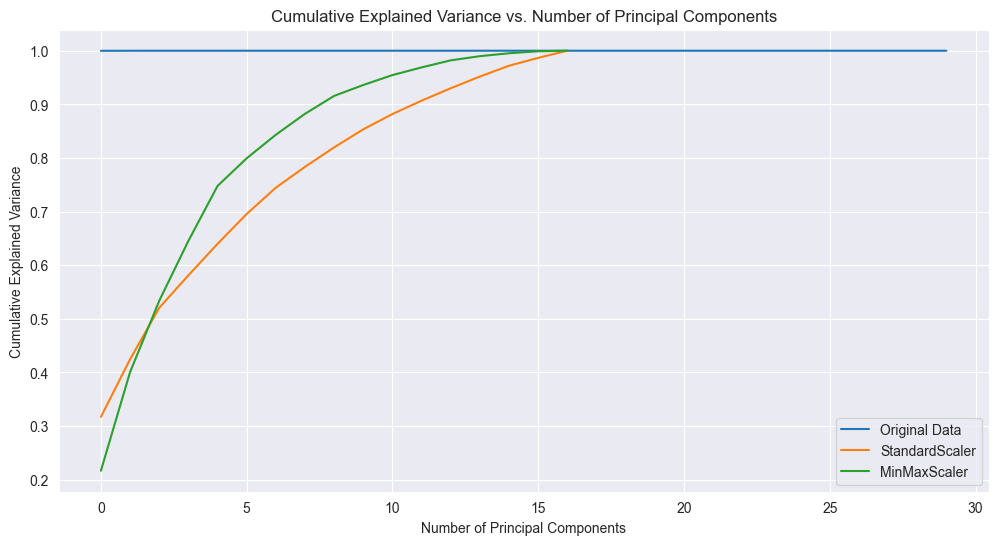

In [143]:
from sklearn.decomposition import PCA

# Initialize PCA for each dataframe
pca_original = PCA()
pca_std = PCA()
pca_mm = PCA()

# Fit and transform the data
X_original_pca = pca_original.fit_transform(Xworkdf)
X_std_pca = pca_std.fit_transform(Xworkdf_std)
X_mm_pca = pca_mm.fit_transform(Xworkdf_mm)

# Calculate cumulative explained variance
cumulative_explained_variance_original = np.cumsum(pca_original.explained_variance_ratio_)
cumulative_explained_variance_std = np.cumsum(pca_std.explained_variance_ratio_)
cumulative_explained_variance_mm = np.cumsum(pca_mm.explained_variance_ratio_)

# Plot the cumulative explained variance
plt.figure(figsize=(12, 6))
plt.plot(cumulative_explained_variance_original, label='Original Data')
plt.plot(cumulative_explained_variance_std, label='StandardScaler')
plt.plot(cumulative_explained_variance_mm, label='MinMaxScaler')
plt.title('Cumulative Explained Variance vs. Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.legend()
plt.show()


In [144]:
#TODO add the analysis and comments for PCA

# Exercise 4 (Dimensionality Reduction and Interpretation of the PCs)